In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(os.listdir('/Users/pankajprajapati/Documents/data/kaggle_data/home_credit/home-credit-default-risk'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [5]:
app_train = pd.read_csv('/Users/pankajprajapati/Documents/data/kaggle_data/home_credit/home-credit-default-risk/application_train.csv')

In [6]:
app_train.shape
app_train.head(5)
# app_train.dtypes

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_test = pd.read_csv('/Users/pankajprajapati/Documents/data/kaggle_data/home_credit/home-credit-default-risk/application_test.csv')

In [8]:
app_test.shape
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# EDA

app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

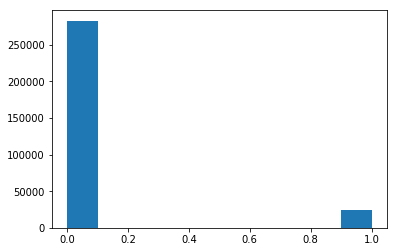

In [10]:
plt.hist(app_train['TARGET'])

In [11]:
# function to find out the missing values by column

def missing_value_table(df):
    mis_val = df.isnull().sum()
    
#     percentage of missing values
    mis_val_percent = df.isnull().sum()*100/len(df)
    
    #make a table of missing values
    mis_val_table = pd.concat((mis_val,mis_val_percent), axis=1)
    
    #rename the columns
    mis_val_table_ren_col = mis_val_table.rename(columns={0:'Missing values',1:'% of missing values'})
    
    #sorting in missings values in decreasing order
    mis_val_table_ren_col = mis_val_table_ren_col.sort_values(by='% of missing values', ascending=False).round(1)
    
    return mis_val_table_ren_col
    

In [12]:
missing_values=missing_value_table(app_train)
missing_values.head(5)

,Missing values,% of missing values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4


In [13]:
#  count of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
app_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [15]:
# doing label encoding

le=LabelEncoder()
le_count=0

# Iterate through the columns

for col in app_train:
    if app_train[col].dtypes=='object':
        if len(list(app_train[col].unique()))<=2:
            le.fit(app_train[col])
            
#             transforming both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count +=1
print ('%d columns were label encoded' % le_count)
    

3 columns were label encoded


In [16]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training feature shape:', app_train.shape)
print('Test feature shape:', app_test.shape)

Training feature shape: (307511, 243)
Test feature shape: (48744, 239)


In [17]:
train_labels = app_train['TARGET']

#Align train and test data to keep the columns which are common in both the dataframes

app_train, app_test = app_train.align(app_test,join='inner',axis=1)

In [18]:
print('Training feature shape:', app_train.shape)
print('Test feature shape:', app_test.shape)

Training feature shape: (307511, 239)
Test feature shape: (48744, 239)


In [19]:
#adding target column back in training set

app_train['TARGET']=train_labels
print('Training feature shape:', app_train.shape)
print('Test feature shape:', app_test.shape)

Training feature shape: (307511, 240)
Test feature shape: (48744, 239)


In [20]:
list(app_train)

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [21]:
app_train['DAYS_BIRTH'].describe()
#Since days birth containing negative values , so to convert it in year dividing values by -365

(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [22]:
# checking days of employment
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

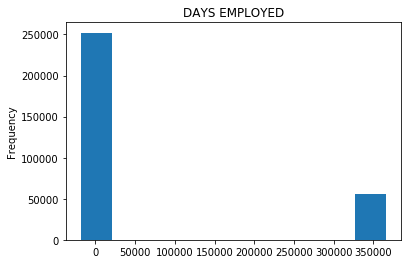

In [23]:
app_train['DAYS_EMPLOYED'].plot.hist(title='DAYS EMPLOYED')

In [24]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]

In [25]:
print('the non anomalies default on %0.2f%% of loan' % (100*non_anom['TARGET'].mean()))
print('the anomalies default on %0.2f%% of loan' % (100*anom['TARGET'].mean()))
print('there are %d anomalous days of employement' %(len(anom)))

the non anomalies default on 8.66% of loan
the anomalies default on 5.40% of loan
there are 55374 anomalous days of employement


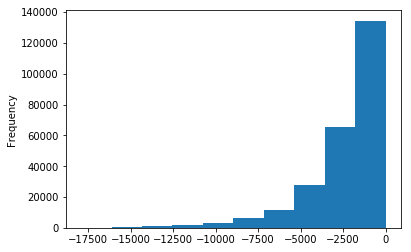

In [26]:
#Creating a boolean column which define whether the value is equal to 365243 or not.
app_train['DAYS_EMPLOYED_ANOM']=app_train['DAYS_EMPLOYED']==365243
#replacing the values in Days_employed=365243 with null.
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist()

In [27]:
app_test['DAYS_EMPLOYED_ANOM']=app_test['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)



In [28]:
print('There are %d anomalies in the test data out of %d' % (len(app_test[app_test['DAYS_EMPLOYED_ANOM']==True]), len(app_test['DAYS_EMPLOYED'])))

There are 9274 anomalies in the test data out of 48744


In [29]:
correlations = app_train.corr()['TARGET'].sort_values(ascending=False)
correlations.head()

TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
Name: TARGET, dtype: float64

In [30]:
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

(array([ 2539.,  7228.,  8085., 13924., 15014., 15829., 15140., 15022.,
        16993., 17186., 16601., 16157., 14686., 14059., 13192., 12763.,
        13523., 14188., 13203., 12517., 12202., 10540.,  9750.,  4580.,
         2590.]),
 array([20.51780822, 22.46191781, 24.4060274 , 26.35013699, 28.29424658,
        30.23835616, 32.18246575, 34.12657534, 36.07068493, 38.01479452,
        39.95890411, 41.9030137 , 43.84712329, 45.79123288, 47.73534247,
        49.67945205, 51.62356164, 53.56767123, 55.51178082, 57.45589041,
        59.4       , 61.34410959, 63.28821918, 65.23232877, 67.17643836,
        69.12054795]),
 <a list of 25 Patch objects>)

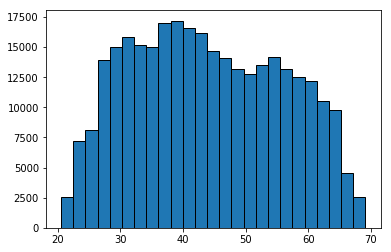

In [31]:
plt.hist(app_train['DAYS_BIRTH']/365,bins=25,edgecolor='k')

Text(0.5,1,'Distribution of ages')

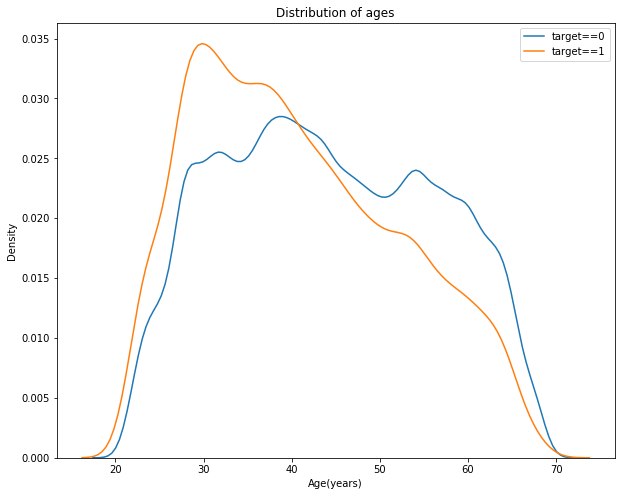

In [32]:
plt.figure(figsize=(10,8))

#plot of loans that were repaid on time

sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label='target==1')

plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of ages')

In [33]:
age_data=app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH']=app_train['DAYS_BIRTH']/365
age_data['YEAR_BINNED']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))

Text(0.5,1,'Failure to repay by age_groups')

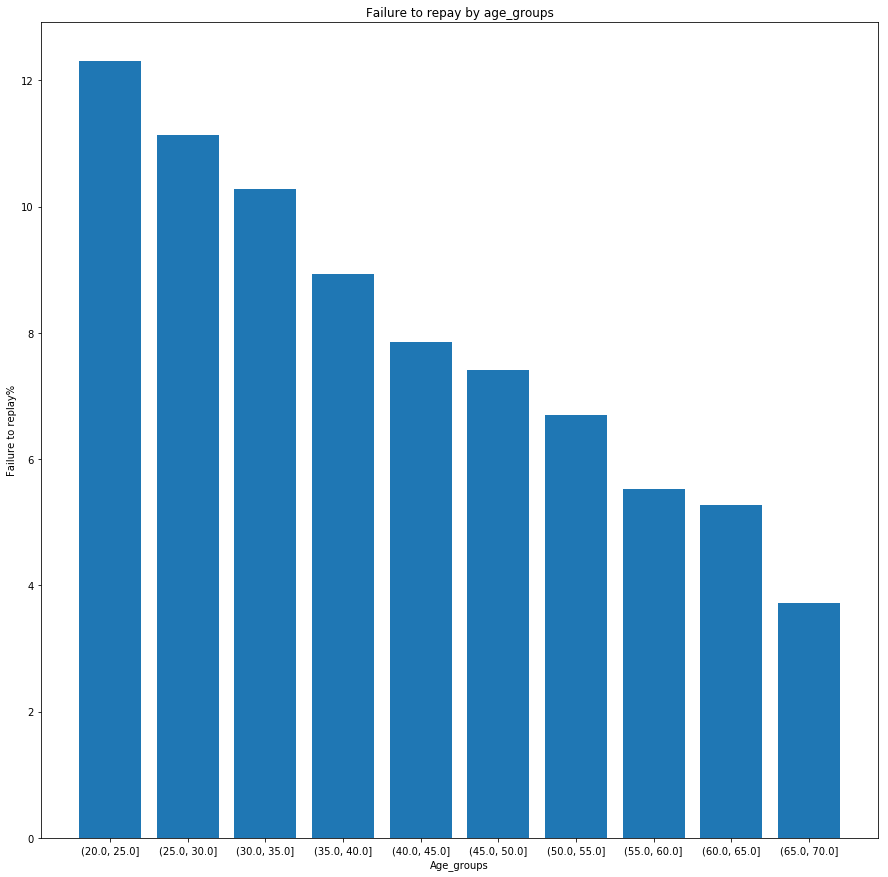

In [34]:
age_groups = age_data.groupby('YEAR_BINNED').mean().reset_index()
plt.figure(figsize=(15,15))
plt.bar(age_groups['YEAR_BINNED'].astype(str), 100*age_groups['TARGET'])
plt.xlabel('Age_groups'); plt.ylabel('Failure to replay%'); plt.title('Failure to repay by age_groups')

In [35]:
#since EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 have strongest negative correlation with the target. So now let's study this data

ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_corr=ext_data.corr()

ext_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


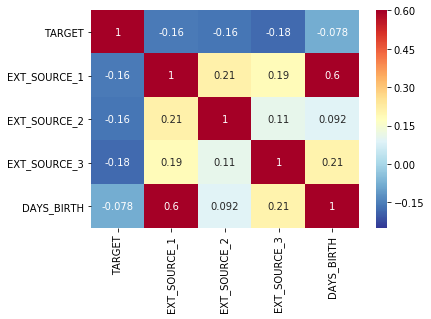

In [36]:
sns.heatmap(ext_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax=0.6)

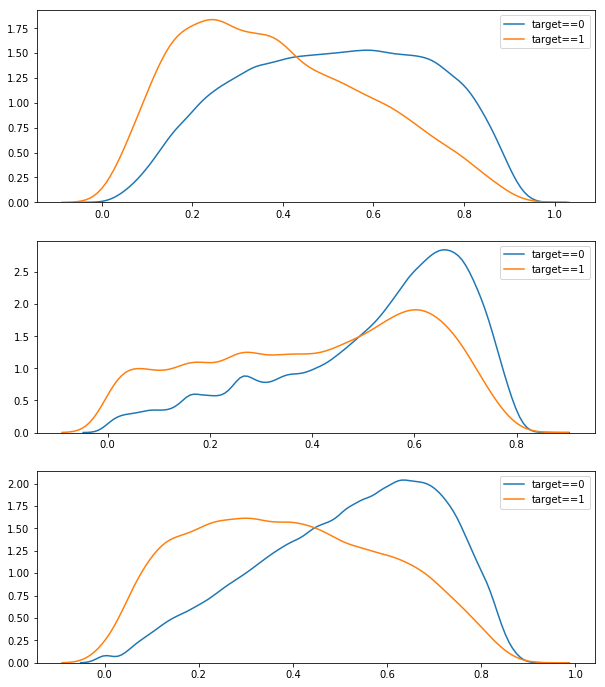

In [37]:
#since external source features have negative correlation with target, it means as ext_source increases people are tend to pay loan more.
plt.figure(figsize=(10,12))
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, source], label='target==0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source], label='target==1')

In [38]:
#now creating pair plot to have a good understanding

plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

#slicing upto 100000 rows.
plot_data = plot_data.dropna().loc[:100000, :]
plot_data

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
6,0,0.774761,0.724000,0.492060,37.747945
8,0,0.587334,0.205747,0.751724,55.065753
10,0,0.319760,0.651862,0.363945,27.936986
11,0,0.722044,0.555183,0.652897,55.936986
12,0,0.464831,0.715042,0.176653,36.819178
15,0,0.115634,0.346634,0.678568,23.912329
21,0,0.437709,0.233767,0.542445,40.589041
25,0,0.561948,0.651406,0.461482,52.969863
28,0,0.600396,0.685011,0.524496,27.380822


/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/pankajprajapati/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'l

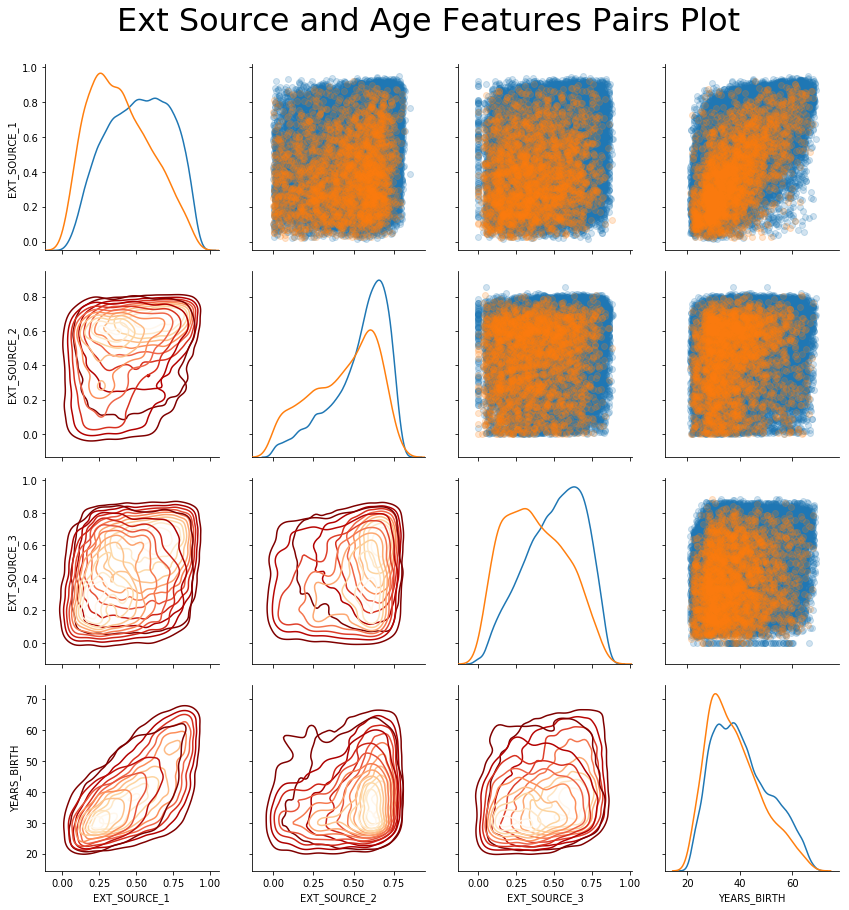

In [39]:
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [40]:
#make a new dataframe for polynomial features

poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

In [41]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])
#imputing missing values

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=3)

In [42]:
poly_features.shape

(307511, 4)

In [43]:

poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features.shape

(307511, 35)

In [44]:
poly_features_test = poly_transformer.transform(poly_features_test)

In [45]:
#this creates multiple features . To get the name of features we will use get feature names function.


poly_feature_names=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])

In [46]:
poly_features = pd.DataFrame(poly_features,columns=poly_feature_names)
poly_features['TARGET'] = poly_target


In [47]:
poly_features.corr()['TARGET'].sort_values()

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_2^2 DAYS_BIRTH                -0.149313
EXT_SOURCE_3^2 DAYS_BIRTH                -0.141777
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                 

In [48]:
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_feature_names)

In [49]:
poly_features['SK_ID_CURR']=app_train['SK_ID_CURR']

app_train_poly = pd.merge(app_train, poly_features, on='SK_ID_CURR',how='left')

In [50]:
app_train_poly.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET_y
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0


In [51]:
pd.merge(app_train,poly_features,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left').head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET_y
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0


In [52]:
app_train.merge(poly_features,on='SK_ID_CURR',how='left').head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET_y
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0


In [53]:
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
#merging features test with test dataframe.

app_test_poly = app_test.merge(poly_features_test,on='SK_ID_CURR',how='inner')

#align the dataframes

app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print (app_train_poly.shape)
print(app_test_poly.shape)

(307511, 275)
(48744, 275)


In [54]:
#lets find credit income percentage
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']

#ANNUITY INCOME PERCENT.
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']

#CREDIT TERM
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_CREDIT']

#DAYS_EMPLOYED_PERCENT
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']


In [55]:
#DOING THE SAME WITH TEST DATA

#lets find credit income percentage
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']

#ANNUITY INCOME PERCENT.
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_INCOME_TOTAL']

#CREDIT TERM
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_CREDIT']

#DAYS_EMPLOYED_PERCENT
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED']/app_test_domain['DAYS_BIRTH']

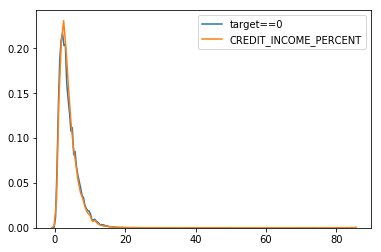

In [56]:
sns.kdeplot(app_train_domain['CREDIT_INCOME_PERCENT'].where(app_train_domain['TARGET']==0),label='target==0')
sns.kdeplot(app_train_domain['CREDIT_INCOME_PERCENT'].where(app_train_domain['TARGET']==1))

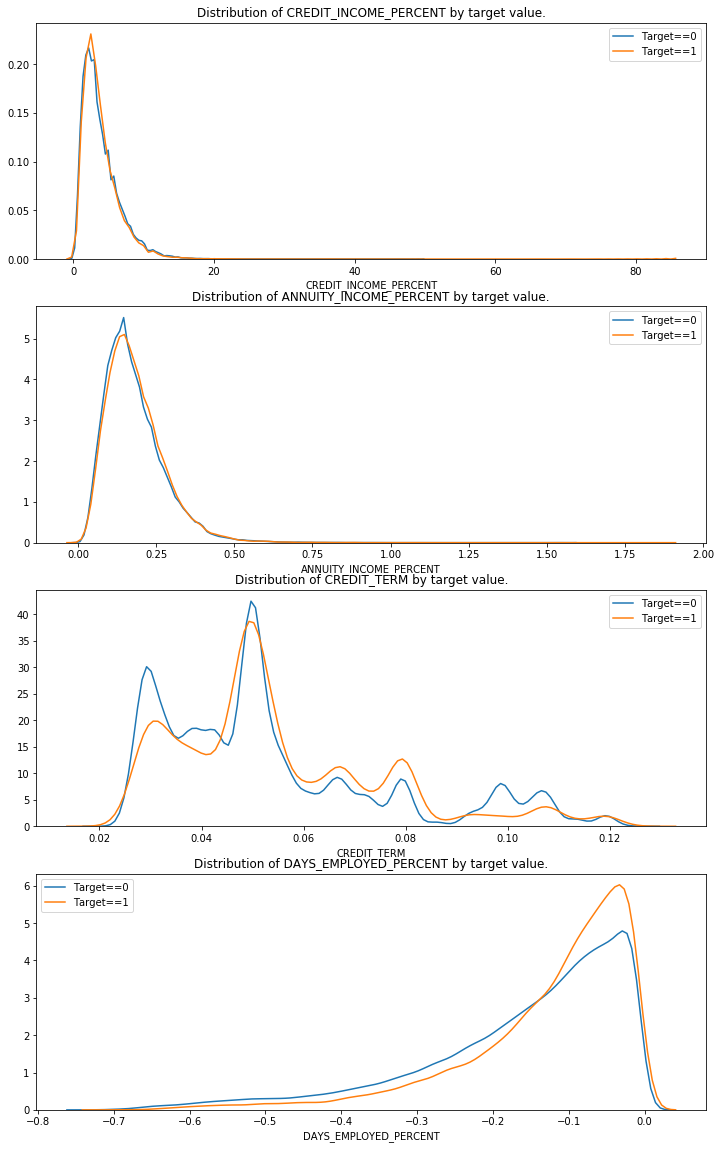

In [57]:
plt.figure(figsize=(12,20))

for i , feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    #create a new subplot for each feature
    plt.subplot(4,1,i+1)
    
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0,feature], label='Target==0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1,feature], label='Target==1')
    
    plt.title('Distribution of %s by target value.' % feature)
    plt.xlabel(feature)

In [58]:
#now implementing logistic regression. first imputing the missing values and doing feature scaling.

if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()
    
        

In [59]:
test = app_test.copy()

features=list(app_train)
features

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [60]:
#imputing median to missing values.

from sklearn.preprocessing import MinMaxScaler

imputer = Imputer(strategy='median')

scaler = MinMaxScaler(feature_range=(0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(app_test)

In [61]:
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [62]:
print(train.shape)
print(test.shape)

(307511, 240)
(48744, 240)


In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train,train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [64]:
log_reg_pred=log_reg.predict_proba(test)[:,1]

In [65]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

In [66]:
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


In [67]:
#using randomforest

from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(n_estimators = 100, random_state = 50, verbose =1, n_jobs = -1)

In [68]:
random_forest.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [99]:
app_train_new = app_train.drop(columns='TARGET')
features = list(app_train_new)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature':features,'importance':feature_importance_values})

In [70]:
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [71]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_baseline.csv', index=False)

In [72]:
#Making predications using Engineered features
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [73]:
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [74]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

#Since this model is also scoring 67.8 score which is equal to scor of earlier model. So it seems like featuring engineering didn't make any effect on model.

In [75]:
#now we'll try app domain feature to test whether the model will improve or not.

app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [76]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

#This will score 67.9 which shows feature engineering is not helping in increasing the score.

In [96]:
#Now working with light gradient boosting

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns to keep the common columns only.
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [98]:
features

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [78]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754949	valid's binary_logloss: 0.563125	train's auc: 0.79887	train's binary_logloss: 0.552616
Early stopping, best iteration is:
[208]	valid's auc: 0.755109	valid's binary_logloss: 0.562276	train's auc: 0.80025	train's binary_logloss: 0.551442
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758539	valid's binary_logloss: 0.563479	train's auc: 0.798518	train's binary_logloss: 0.553271
Early stopping, best iteration is:
[217]	valid's auc: 0.758619	valid's binary_logloss: 0.561732	train's auc: 0.801374	train's binary_logloss: 0.55077
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762652	valid's binary_logloss: 0.564246	train's auc: 0.79774	train's binary_logloss: 0.553986
[400]	valid's auc: 0.762202	valid's binary_logloss: 0.546576	train's auc: 0.827288	train's bina

In [91]:
features

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [85]:
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df


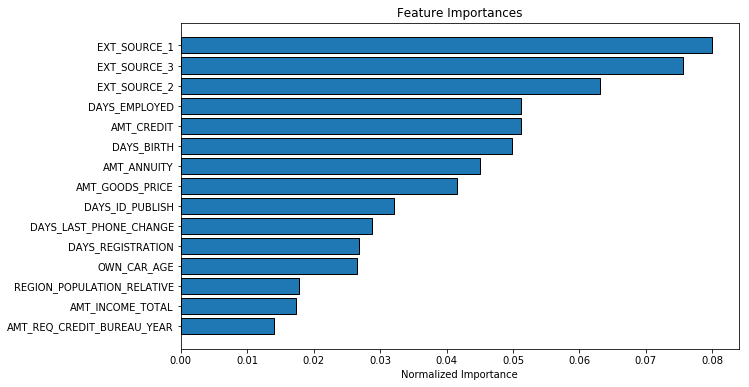

In [87]:
fi_sorted = plot_feature_importances(fi)

In [88]:
submission.to_csv('baseline_lgb.csv', index = False)

In [89]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762577	valid's binary_logloss: 0.557281	train's auc: 0.804531	train's binary_logloss: 0.547193
Early stopping, best iteration is:
[237]	valid's auc: 0.762858	valid's binary_logloss: 0.553438	train's auc: 0.810671	train's binary_logloss: 0.541669
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765594	valid's binary_logloss: 0.55808	train's auc: 0.804304	train's binary_logloss: 0.547593
Early stopping, best iteration is:
[227]	valid's auc: 0.765861	valid's binary_logloss: 0.555268	train's auc: 0.808665	train's binary_logloss: 0.543656
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770139	valid's binary_logloss: 0.557892	train's auc: 0.803753	train's binary_logloss: 0.548213
[400]	valid's auc: 0.770328	valid's binary_logloss: 0.538395	train's auc: 0.834338	train's b

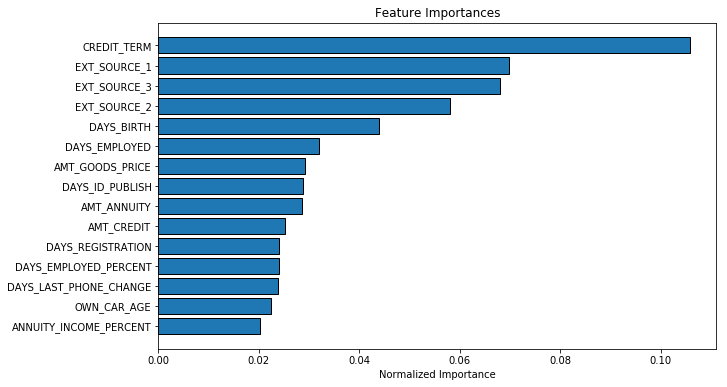

In [90]:
fi_sorted = plot_feature_importances(fi_domain)


In [ ]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)
